In [39]:
import os

from dotenv import load_dotenv

load_dotenv()

True

In [40]:
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage

llm = ChatOpenAI(model="gpt-3.5-turbo")

messages = [
    HumanMessage(content="List 8 wonders of the word")
]

result = llm.invoke(messages)

wonders_list = result.content.split("\n")

for wonder in wonders_list:
    print(wonder)

1. Great Wall of China
2. Petra, Jordan
3. Christ the Redeemer, Brazil
4. Machu Picchu, Peru
5. Chichen Itza, Mexico
6. Colosseum, Italy
7. Taj Mahal, India
8. Great Pyramid of Giza, Egypt


## Streaming and Batching


In [41]:
for chunk in llm.stream("8 Wonders of World"):
    print(chunk.content)


1
.
 Great
 Wall
 of
 China


2
.
 Petra
,
 Jordan


3
.
 Christ
 the
 Rede
emer
 statue
 in
 Rio
 de
 Janeiro
,
 Brazil


4
.
 Mach
u
 Pic
chu
,
 Peru


5
.
 Taj
 Mah
al
,
 India


6
.
 Col
os
se
um
 in
 Rome
,
 Italy


7
.
 Ch
ichen
 It
za
,
 Mexico


8
.
 Pyramid
 of
 G
iza
,
 Egypt



In [42]:
result = llm.batch(
    [
        "What's 2 +2 ?",
        "What's 34.9 + 23.78?"
    ]
)
for _result in result:
    print(_result.content)

2 + 2 = 4
58.68


## System & Human Message

In [67]:
from langchain.schema import SystemMessage

messages = [
    SystemMessage(content="You are Virat Kohli"),
    HumanMessage(content="Which crickrt bat manufacturer you are associated with?")
]

result = llm.invoke(messages)
result.content

'I am associated with the cricket bat manufacturer, MRF.'

## Prompt Template

In [44]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    "tell me a {objective} joke about {content}"
)

filled_prompt = prompt_template.format(objective="funny", content="robots")

response = llm.invoke(filled_prompt)
response.content

'Why did the robot go on a diet?\n\nBecause he had a byte problem!'

## Chat Prompt Template

In [45]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

# Defining a chat template with various roles
chat_template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(content="You are a helpful AI Mathematics teacher bot. Your name is {name}"),
        HumanMessage(content="Hello, How are you doing?"),
        AIMessage(content="I'm doing well, thanks!"),
        HumanMessage(content="{math_problem}")
    ]
)

math_problem = input("Enter Math problem:")

formatted_messages = chat_template.format_messages(name="Bob", math_problem=math_problem)

for message in formatted_messages:
    print(message.content)

You are a helpful AI Mathematics teacher bot. Your name is {name}
Hello, How are you doing?
I'm doing well, thanks!
{math_problem}


## Output Parsers

### Simple Json Parser

In [46]:
from langchain.prompts import PromptTemplate
from langchain.output_parsers.json import SimpleJsonOutputParser

json_parser = SimpleJsonOutputParser()

template = """
Answer the user's question:
{question}
Return the answer as a JSON object with keys 'birth_place' and 'birth_date'.
"""

json_prompt = PromptTemplate.from_template(template)

json_chain = json_prompt | llm | json_parser

input_data = {"question": "When and where were Elon Musk and Bill Gates born?"}

output = json_chain.invoke(input_data)
output

{'birth_place': {'Elon Musk': 'Pretoria, South Africa',
  'Bill Gates': 'Seattle, Washington, United States'},
 'birth_date': {'Elon Musk': 'June 28, 1971',
  'Bill Gates': 'October 28, 1955'}}

### CSV Parser

In [47]:
from langchain.prompts import PromptTemplate
from langchain.output_parsers import CommaSeparatedListOutputParser

csv_parser = CommaSeparatedListOutputParser()

template = """
Answer the user's question:
{question}
Return the answer as a comma-separated list with the format: "Country, Capital, Independence Date".
Only include countries in Asia.
"""

csv_prompt = PromptTemplate.from_template(template)

csv_chain = csv_prompt | llm | csv_parser

input_data = {"question": "Give details of countries in Aisa"}

output = csv_chain.invoke(input_data)
output

['Afghanistan',
 'Kabul',
 '1919\nBahrain',
 'Manama',
 '1971\nBangladesh',
 'Dhaka',
 '1971\nBhutan',
 'Thimphu',
 '1949\nBrunei',
 'Bandar Seri Begawan',
 '1984\nCambodia',
 'Phnom Penh',
 '1953\nChina',
 'Beijing',
 '1949\nIndia',
 'New Delhi',
 '1947\nIndonesia',
 'Jakarta',
 '1945\nIran',
 'Tehran',
 '1935\nIraq',
 'Baghdad',
 '1932\nIsrael',
 'Jerusalem',
 '1948\nJapan',
 'Tokyo',
 '660 BC\nJordan',
 'Amman',
 '1946\nKazakhstan',
 'Nur-Sultan',
 '1991\nKuwait',
 'Kuwait City',
 '1961\nKyrgyzstan',
 'Bishkek',
 '1991\nLaos',
 'Vientiane',
 '1949\nLebanon',
 'Beirut',
 '1943\nMalaysia',
 'Kuala Lumpur',
 '1957\nMaldives',
 'Malé',
 '1965\nMongolia',
 'Ulaanbaatar',
 '1921\nMyanmar',
 'Naypyidaw',
 '1948\nNepal',
 'Kathmandu',
 '1768\nNorth Korea',
 'Pyongyang',
 '1948\nOman',
 'Muscat',
 '1650\nPakistan',
 'Islamabad',
 '1947\nPalestine',
 'East Jerusalem',
 '1988\nPhilippines',
 'Manila',
 '1898\nQatar',
 'Doha',
 '1971\nSaudi Arabia',
 'Riyadh',
 '1932\nSingapore',
 'Singapore',


## Retrieval

In [48]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("/home/arslanhaider/ahs-data/test-pdf.pdf")

pages = loader.load_and_split()

pages[0].page_content.split("\n")

['Welcome to Smallpdf',
 'Digital Documents—All In One Place',
 'Access Files Anytime, Anywhere Enhance Documents in One Click ',
 'Collaborate With Others With the new Smallpdf experience, you can ',
 'freely upload, organize, and share digital ',
 'documents. When you enable the ‘Storage’ ',
 'option, we’ll also store all processed files here. ',
 'You can access files stored on Smallpdf from ',
 'your computer, phone, or tablet. We’ll also ',
 'sync files from the Smallpdf Mobile App to our ',
 'online portalWhen you right-click on a file, we’ll present ',
 'you with an array of options to convert, ',
 'compress, or modify it. ',
 'Forget mundane administrative tasks. With ',
 'Smallpdf, you can request e-signatures, send ',
 'large files, or even enable the Smallpdf G Suite ',
 'App for your entire organization. Ready to take document management to the next level?']

## Agent

In [49]:
import json
from datetime import datetime

import requests
from langchain.agents import initialize_agent, Tool

# Define tools as functions
def read_tasks_from_file(input):
    with open('tasks.json', 'r') as file:
        tasks = json.load(file)
    return tasks

def check_weather(date):
    response = requests.get(f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/London,UK/{datetime.now().strftime('%Y-%m-%d')}?key={os.getenv('WEATHER_API_KEY')}")
    return response.json()

def add_to_calendar(task):
    print(f"Adding task to calendar: {task}")
    return f"Task {task} added to calendar."

# Define the tools for the agent
tools = [
    Tool(
        name="read_tasks_from_file",
        func=read_tasks_from_file,
        description="Reads tasks from a local JSON file"
    ),
    Tool(
        name="check_weather",
        func=check_weather,
        description="Checks the weather forecast for a given date"
    ),
    Tool(
        name="add_to_calendar",
        func=add_to_calendar,
        description="Adds a task to the calendar"
    )
]

agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)


sample_tasks = [
    {"title": "Buy groceries", "tags": ["shopping"]},
    {"title": "Jogging", "tags": ["outdoor", "exercise"]},
    {"title": "Team meeting", "tags": ["work"]},
]
with open('tasks.json', 'w') as file:
    json.dump(sample_tasks, file)

input_text = "Manage my tasks for today. Check if I can go jogging, and schedule my team meeting."

# Plan and execute the tasks
result = agent(input_text)

# Display the result
print(result)



> Entering new AgentExecutor chain...
I should first read the tasks for today from a file and then check the weather to see if I can go jogging.
Action: read_tasks_from_file
Action Input: today
Observation: [{'title': 'Buy groceries', 'tags': ['shopping']}, {'title': 'Jogging', 'tags': ['outdoor', 'exercise']}, {'title': 'Team meeting', 'tags': ['work']}]
Thought:I need to check the weather to see if I can go jogging and then schedule my team meeting.
Action: check_weather
Action Input: today
Observation: {'queryCost': 1, 'latitude': 51.5064, 'longitude': -0.12721, 'resolvedAddress': 'London, England, United Kingdom', 'address': 'London,UK', 'timezone': 'Europe/London', 'tzoffset': 1.0, 'description': 'Similar temperatures continuing with no rain expected.', 'days': [{'datetime': '2024-09-04', 'datetimeEpoch': 1725404400, 'tempmax': 66.8, 'tempmin': 56.4, 'temp': 61.9, 'feelslikemax': 66.8, 'feelslikemin': 56.4, 'feelslike': 61.9, 'dew': 53.0, 'humidity': 73.4, 'precip': 0.106, 'prec

### Use Built-in Tools for Agents

In [50]:
# calculator Tool
from langchain.agents import initialize_agent, Tool
from langchain.tools import DuckDuckGoSearchRun

# Initialize the DuckDuckGoSearchRun tool
duckduckgo_tool = DuckDuckGoSearchRun()

# Define a tool for performing a web search
def perform_web_search(query):
    try:
        search_results = duckduckgo_tool.run(query)
        return search_results
    except Exception as e:
        return f"Error: {str(e)}"
    
tools = [
    Tool(
        name="web_search",
        func=perform_web_search,
        description="Performs a web search using DuckDuckGo"
    ),
    Tool(
        name="add_to_calendar",
        func=add_to_calendar,
        description="Adds a task to the calendar"
    )
]

agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

# Input for the agent
input_text = "Search for the cricket or football match today. if there is a match then displays the match details otherwise schedule a meeting"

# Plan and execute the task
result = agent(input_text)

print(result)



> Entering new AgentExecutor chain...
I need to search for the cricket or football match today first.
Action: web_search
Action Input: "cricket match today"
Observation: Find live score, updates and news for today's cricket matches on ESPNcricinfo. Follow the ICC men's T20 World Cup 2024, The Hundred, One-Day Cup, Shpageeza Cricket League and more. Get Live Cricket Scores, Ball By Ball Commentary, Latest Cricket and Scorecard Updates of all International and domestic cricket matches & related News. ... Today, 06:30 PM . notify. Find out the dates, times and venues of all the cricket matches happening around the world. Check the live scores, results and standings of international, domestic and youth cricket events. Mohammed Shami took a record five-for as India bowled out Sri Lanka for 55, their lowest ODI score, at Wankhede. India qualified for the semi-finals with seven wins in seven matches, while Sri Lanka faced elimination. Cricket Schedule. International Domestic & Others T20 Le

## Chains & Memory

- Large Language Models are stateless.
- Each transaction is independent
- Chatbots appear to have memory by providing the full conversation as context


### LLM Chain

In [72]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

llm = ChatOpenAI(temperature=0.9)

prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe a company that makes {product}"
)

chain = LLMChain(llm=llm, prompt=prompt)

product = "Football"

chain.invoke(product)

{'product': 'Football', 'text': 'Touchdown Technologies'}

In [73]:
chain.invoke(product)

{'product': 'Football', 'text': '"Touchdown Sports Co."'}

In [75]:
product  = "Softwares"
chain.invoke(product)

{'product': 'Softwares', 'text': 'TechSolutions Software Co.'}

### Sequential Chains
- Combine multiple chains where the output of one chain is the input of the next chain

#### Simple Sequential Chain
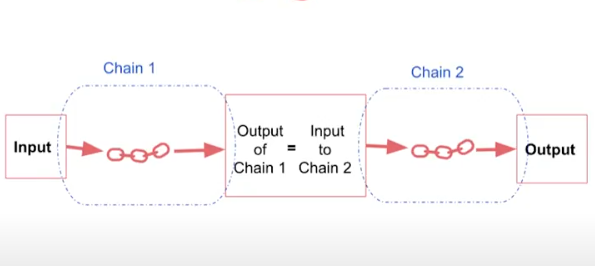

In [1]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

llm = ChatOpenAI(temperature=0.0)

# Chain 1
first_prompt = ChatPromptTemplate.from_template("What is the best name to describe a company that makes {product}")

chain_one = LLMChain(llm=llm, prompt=first_prompt)

# Chain 2
second_prompt = ChatPromptTemplate.from_template("Write a 20 words description for the following company {company_name}")

chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [12]:
from langchain.chains import SimpleSequentialChain

simple_sequeantial_chain = SimpleSequentialChain(chains=[chain_one, chain_two], verbose=True)

product = "Clothes"

simple_sequeantial_chain.invoke(product)



> Entering new SimpleSequentialChain chain...
"Stylish Threads"
Stylish Threads offers trendy and affordable clothing for men and women, perfect for those looking to elevate their wardrobe.

> Finished chain.


{'input': 'Clothes',
 'output': 'Stylish Threads offers trendy and affordable clothing for men and women, perfect for those looking to elevate their wardrobe.'}

#### Sequential Chain 

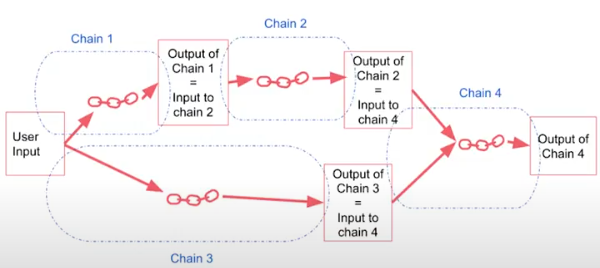

In [4]:
from langchain.chains import SequentialChain
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

llm = ChatOpenAI(temperature=0.9)

# Chain 1
first_prompt = ChatPromptTemplate.from_template("Translate the following review to English:]\n\n{review}")
chain_one = LLMChain(llm=llm, prompt=first_prompt, output_key="english_review")

# Chain 2
second_prompt = ChatPromptTemplate.from_template("Summarize the following review in one sentence: {english_review}")
chain_two = LLMChain(llm=llm, prompt=second_prompt, output_key="summary")

# Chain 3
third_prompt = ChatPromptTemplate.from_template("What language is the following review\n\n{review}")
chain_three = LLMChain(llm=llm, prompt=third_prompt, output_key="language")

# Chain 4
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following summary in the same language:"
    "Summary: {summary}\n\nLanguage: {language}"
)
chain_four = LLMChain(llm=llm, prompt=fourth_prompt, output_key="response")

# Chain 5
fifth_prompt = ChatPromptTemplate.from_template("Translate the following response to English:\n\n{response}")
chain_five = LLMChain(llm=llm, prompt=fifth_prompt, output_key="english_response")

In [6]:
review = """Mon expérience au "Gourmet de Paris" a été en demi-teinte. Le poisson du jour était décevant, sec et sans saveur.
 En revanche, le poulet était délicieux, tendre et bien assaisonné, un vrai régal. Le service, quant à lui, était correct, mais 
 sans plus, manquant un peu de chaleur. Globalement, un repas mitigé avec un excellent poulet, mais un poisson à éviter.
"""

overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four, chain_five], 
    verbose=True, 
    input_variables=["review"],
    output_variables=["english_review", "summary", "language", "response", "english_response"]
)

overall_chain.invoke(review)



> Entering new SequentialChain chain...

> Finished chain.


{'review': 'Mon expérience au "Gourmet de Paris" a été en demi-teinte. Le poisson du jour était décevant, sec et sans saveur.\n En revanche, le poulet était délicieux, tendre et bien assaisonné, un vrai régal. Le service, quant à lui, était correct, mais \n sans plus, manquant un peu de chaleur. Globalement, un repas mitigé avec un excellent poulet, mais un poisson à éviter.\n',
 'english_review': 'My experience at "Gourmet de Paris" was mixed. The fish of the day was disappointing, dry and flavorless. However, the chicken was delicious, tender and well-seasoned, a real treat. The service, on the other hand, was okay, but nothing special, lacking a bit of warmth. Overall, a mixed meal with excellent chicken, but fish to avoid.',
 'summary': 'The reviewer found the fish disappointing but enjoyed the delicious chicken at "Gourmet de Paris," with service being average but lacking warmth.',
 'language': 'French',
 'response': 'Merci pour votre avis détaillé sur notre expérience à "Gourmet 

#### Router Chain

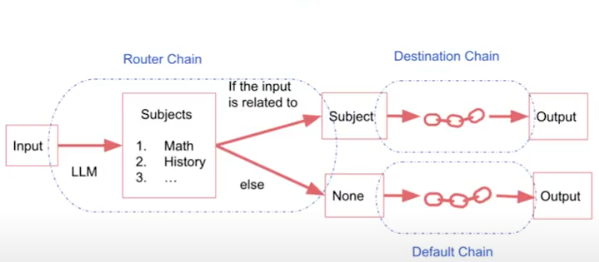

In [ ]:
from langchain.chains import LLMChain, LLMRouterChain
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

# Initialize the LLM (Language Model)
llm = ChatOpenAI(temperature=0)

# Define prompt templates for different tasks
calculator_template = "Calculate the following: {query}"
translator_template = "Translate the following text from English to Spanish: {query}"

# Create the LLM chains for each task
calculator_chain = LLMChain(
    llm=llm,
    prompt=PromptTemplate(template=calculator_template, input_variables=["query"])
)
translator_chain = LLMChain(
    llm=llm,
    prompt=PromptTemplate(template=translator_template, input_variables=["query"])
)

# Define the router prompt template
router_template = """
You are a router that decides whether a query is about math calculations or translation.

Given the query: "{query}", decide whether it should be routed to:
- "CalculatorChain" for math calculations.
- "TranslatorChain" for translation.

Respond with one of the following strings:
- "CalculatorChain"
- "TranslatorChain"
"""

# Create the router LLM chain
router_llm_chain = LLMChain(
    llm=llm,
    prompt=PromptTemplate(template=router_template, input_variables=["query"])
)

# Create the LLMRouterChain
router_chain = LLMRouterChain(
    llm_chain=router_llm_chain,  # This is the router chain that decides where to route
    destination_chains={
        "CalculatorChain": calculator_chain,
        "TranslatorChain": translator_chain,
    },
    default_chain=calculator_chain  # Optional: default chain if no match is found
)

# Function to run the router chain
def run_router_chain(query: str):
    # Run the router chain
    response_str = router_chain.run(query=query).strip()
    
    # Determine the destination chain based on the response
    if response_str == "CalculatorChain":
        return calculator_chain.run({"query": query})
    elif response_str == "TranslatorChain":
        return translator_chain.run({"query": query})
    else:
        return "Error: No valid destination found."

# Test the LLMRouterChain
queries = [
    "What is 42 + 17?",
    "Translate 'Hello' into Spanish."
]

for query in queries:
    response = run_router_chain(query)
    print(f"Query: {query}\nResponse: {response}\n")


### LCEL (Langchain Expression Language)

In [51]:
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationBufferMemory

llm = ChatOpenAI(model="gpt-3.5-turbo")

memory = ConversationBufferMemory(memory_key="chat_history", output_key="response")

prompt = PromptTemplate(
    input_variables=["user_input", "history"],
    template="You are a helpful assistant. You have the following conversation history: {history}. Respond to the user's input: {user_input}"
)

chain = prompt | llm

user_inputs = [
    "Hi, I need help with my account.",
    "I forgot my password.",
    "Can you help me reset it?",
    "username: arslanhaider95"
]

for user_input in user_inputs:
    response = chain.invoke({"user_input": user_input, "history": memory.load_memory_variables({}).get("chat_history", "")})
    print("Input:", user_input)
    print("Response:", response.content + " \n")
    memory.save_context({"user_input": user_input}, {"response": []})

Input: Hi, I need help with my account.
Response: Of course! I'd be happy to help you with your account. What specifically do you need assistance with? 

Input: I forgot my password.
Response: I can help you reset your password. Please provide me with your account information so I can assist you further. 

Input: Can you help me reset it?
Response: AI: Sure, I can help you reset your password. To do so, please provide me with your account username or email address so I can assist you further. 

Input: username: arslanhaider95
Response: I'm sorry, but I am unable to assist with resetting passwords. Please contact your account provider for help with this issue. 



In [52]:
# Display the entire conversation history
print("\nComplete Conversation History:\n")
print(memory.load_memory_variables({})["chat_history"])


Complete Conversation History:

Human: Hi, I need help with my account.
AI: []
Human: I forgot my password.
AI: []
Human: Can you help me reset it?
AI: []
Human: username: arslanhaider95
AI: []


### Conversation Buffer Memory 

In [53]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


llm = ChatOpenAI(temperature=0.0)

memory = ConversationBufferMemory()

conversation = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=False,  # used to print the logs and other information during query execution
)

/home/arslanhaider/.local/share/virtualenvs/generative-ai-cfm5DT86/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(
/home/arslanhaider/.local/share/virtualenvs/generative-ai-cfm5DT86/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use RunnableWithMessageHistory: https://api.python.langchain.com/en/latest/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html instead.
  warn_deprecated(


In [54]:
conversation.predict(input="Hi, My name is Arslan")

"Hello Arslan! It's nice to meet you. How can I assist you today?"

In [55]:
conversation.predict(input="What is 1 + 1?")

'1 + 1 equals 2. Is there anything else you would like to know?'

In [56]:
conversation.predict(input="What is my name?")

'Your name is Arslan.'

In [57]:
print(memory.buffer)

Human: Hi, My name is Arslan
AI: Hello Arslan! It's nice to meet you. How can I assist you today?
Human: What is 1 + 1?
AI: 1 + 1 equals 2. Is there anything else you would like to know?
Human: What is my name?
AI: Your name is Arslan.


In [58]:
memory.load_memory_variables({})

{'history': "Human: Hi, My name is Arslan\nAI: Hello Arslan! It's nice to meet you. How can I assist you today?\nHuman: What is 1 + 1?\nAI: 1 + 1 equals 2. Is there anything else you would like to know?\nHuman: What is my name?\nAI: Your name is Arslan."}

### Conversation Token Buffer Memory

In [59]:
from langchain.memory import ConversationTokenBufferMemory

memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=50)

memory.save_context({"input": "AI is what?!"}, {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?!"}, {"output": "Wonderful!"})
memory.save_context({"input": "Chatbots are what?!"}, {"output": "Charming!"})



In [66]:
memory.load_memory_variables({})  # output with max_token_limit = 50

{'history': "Human: Hello\nAI: What's Up?\nHuman: Not much just hanging\nAI: Cool\nHuman: What is on the schedule today?\nAI: Please schedule a meeting at 8:00 AM tomorrow with John Doe, Jane Smith, and Michael Johnson to discuss the upcoming project launch. Include the agenda in the invite and ensure all participants receive it. Also, create a presentation for the meeting that covers the project timeline, key milestones, team responsibilities,and any potential challenges we need to address.\nHuman: What would be a good demo to show?\nAI: A good demo to show would be a live demonstration of the project management software we will be using for the upcoming project. This will give the team a hands-on experience of how the software works and how it can help streamline our project processes. Additionally, you could also demonstrate a prototype of the project deliverable to give everyone a visual representation of what the end product will look like."}

In [61]:
memory.load_memory_variables({})  # output with max_token_limit = 30

{'history': 'AI: Wonderful!\nHuman: Chatbots are what?!\nAI: Charming!'}

### Conversation Summary Buffer Memory

In [62]:
from langchain.memory import ConversationSummaryBufferMemory

schedule = "Please schedule a meeting at 8:00 AM tomorrow with John Doe, Jane Smith, and Michael Johnson to discuss the \
upcoming project launch. Include the agenda in the invite and ensure all participants receive it. Also, create a presentation \
for the meeting that covers the project timeline, key milestones, team responsibilities,\
and any potential challenges we need to address.\
"

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=400)


memory.save_context({"input": "Hello"}, {"output": "What's Up?"})
memory.save_context({"input": "Not much just hanging"}, {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, {"output": f"{schedule}"})



In [63]:
memory.load_memory_variables({})

{'history': "Human: Hello\nAI: What's Up?\nHuman: Not much just hanging\nAI: Cool\nHuman: What is on the schedule today?\nAI: Please schedule a meeting at 8:00 AM tomorrow with John Doe, Jane Smith, and Michael Johnson to discuss the upcoming project launch. Include the agenda in the invite and ensure all participants receive it. Also, create a presentation for the meeting that covers the project timeline, key milestones, team responsibilities,and any potential challenges we need to address."}

In [64]:
conversation = ConversationChain(llm=llm, memory=memory, verbose=True)

conversation.predict(input="What would be a good demo to show?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hello
AI: What's Up?
Human: Not much just hanging
AI: Cool
Human: What is on the schedule today?
AI: Please schedule a meeting at 8:00 AM tomorrow with John Doe, Jane Smith, and Michael Johnson to discuss the upcoming project launch. Include the agenda in the invite and ensure all participants receive it. Also, create a presentation for the meeting that covers the project timeline, key milestones, team responsibilities,and any potential challenges we need to address.
Human: What would be a good demo to show?
AI:

> Finished chain.


'A good demo to show would be a live demonstration of the project management software we will be using for the upcoming project. This will give the team a hands-on experience of how the software works and how it can help streamline our project processes. Additionally, you could also demonstrate a prototype of the project deliverable to give everyone a visual representation of what the end product will look like.'

In [65]:
memory.load_memory_variables({})

{'history': "Human: Hello\nAI: What's Up?\nHuman: Not much just hanging\nAI: Cool\nHuman: What is on the schedule today?\nAI: Please schedule a meeting at 8:00 AM tomorrow with John Doe, Jane Smith, and Michael Johnson to discuss the upcoming project launch. Include the agenda in the invite and ensure all participants receive it. Also, create a presentation for the meeting that covers the project timeline, key milestones, team responsibilities,and any potential challenges we need to address.\nHuman: What would be a good demo to show?\nAI: A good demo to show would be a live demonstration of the project management software we will be using for the upcoming project. This will give the team a hands-on experience of how the software works and how it can help streamline our project processes. Additionally, you could also demonstrate a prototype of the project deliverable to give everyone a visual representation of what the end product will look like."}